项目根目录已添加到Python路径: c:\Users\29729\OneDrive\文档\python软件开发实践\telco_churn_analysis
--- 开始模型实验与评估 ---
加载原始数据并进行预处理...
数据已成功从 'c:\Users\29729\OneDrive\文档\python软件开发实践\telco_churn_analysis\data\raw\telco_customer_churn.csv' 加载。
--- 开始数据预处理 ---
TotalCharges 列中的 11 个缺失值已根据 tenure=0 填充为 0。
已删除 'customerID' 列。
已对二元特征 'gender' 进行标签编码。
已对二元特征 'Partner' 进行标签编码。
已对二元特征 'Dependents' 进行标签编码。
已对二元特征 'PhoneService' 进行标签编码。
已对二元特征 'PaperlessBilling' 进行标签编码。
已对二元特征 'Churn' 进行标签编码。
即将对以下多元分类特征进行独热编码: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
已对多元分类特征进行独热编码。
即将对以下数值特征进行标准化: ['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
已对数值特征进行标准化。
--- 数据预处理完成 ---

##### 训练和评估 Logistic Regression 模型 #####
--- 训练模型: LogisticRegression (SMOTE: False) ---
LogisticRegression 模型训练完成。

--- 模型评估: LogisticRegression ---

测试集性能指标:
准确率 (Acc

c:\Users\29729\OneDrive\文档\python软件开发实践\telco_churn_analysis\src\preprocessor.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['TotalCharges'].fillna(0, inplace=True)


RandomForest 模型训练完成。

--- 模型评估: RandomForest ---

测试集性能指标:
准确率 (Accuracy): 0.7977
精确率 (Precision): 0.6478
召回率 (Recall): 0.5214
F1-Score: 0.5778
ROC AUC Score: 0.8373

混淆矩阵:
[[929 106]
 [179 195]]

分类报告:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

模型已保存到 'c:\Users\29729\OneDrive\文档\python软件开发实践\telco_churn_analysis\models\churn_prediction_model_rf_no_smote.pkl'。

##### 训练和评估 Random Forest 模型 (带 SMOTE) #####
--- 训练模型: RandomForest (SMOTE: True) ---
正在使用 SMOTE 进行过采样...
原始训练集形状: X=(5634, 40), y=(5634,)
SMOTE后训练集形状: X=(8278, 40), y=(8278,)
RandomForest 模型训练完成。

--- 模型评估: Random Forest (SMOTE) ---

测试集性能指标:
准确率 (Accuracy): 0.7722
精确率 (Precision): 0.5560
召回率 (Recall): 0.7032
F1-Score: 0.6210
ROC AUC Score: 0.8378



,accuracy,precision,recall,f1_score,ROC_AUC
Logistic Regression,0.805536,0.657233,0.558824,0.604046,0.841975
Gradient Boosting (SMOTE),0.775018,0.563193,0.679144,0.615758,0.840487
Random Forest (SMOTE),0.772179,0.556025,0.703209,0.621015,0.837814
Random Forest (No SMOTE),0.797729,0.647841,0.52139,0.577778,0.837321



##### 绘制 ROC 曲线 #####


<Figure size 640x480 with 0 Axes>

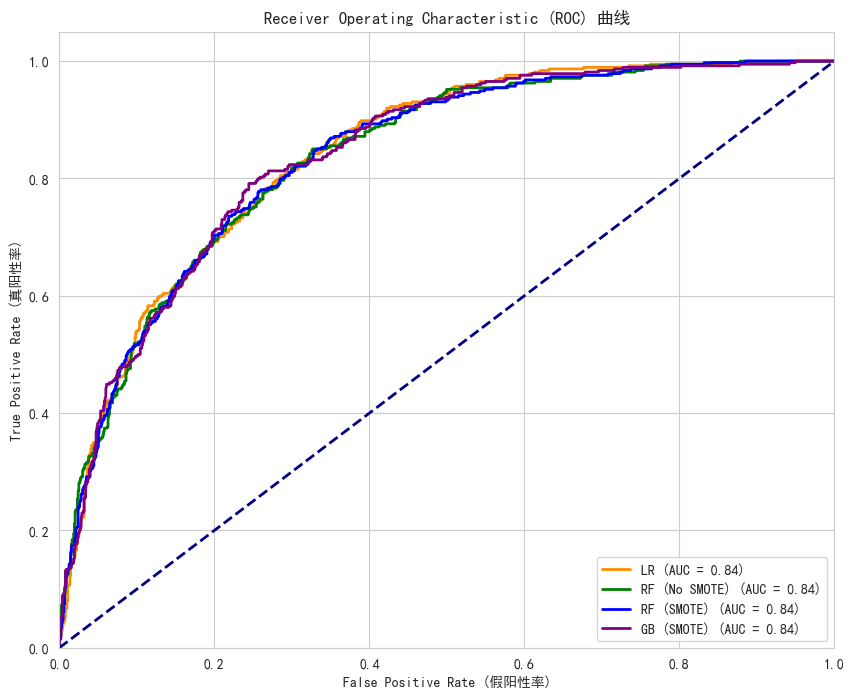


##### 特征重要性分析 (Random Forest with SMOTE) #####
Top 15 特征重要性:


,Feature,Importance
0,Contract_Month-to-month,0.059333
1,OnlineSecurity_Yes,0.012136
2,OnlineSecurity_No,0.007665
3,InternetService_DSL,0.006671
4,TechSupport_Yes,0.006458
5,Contract_One year,0.005820
6,PaymentMethod_Electronic check,0.005536
7,OnlineBackup_Yes,0.005323
8,Contract_Two year,0.005039
9,TechSupport_No,0.004755


C:\Users\29729\AppData\Local\Temp\ipykernel_104156\3936360635.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


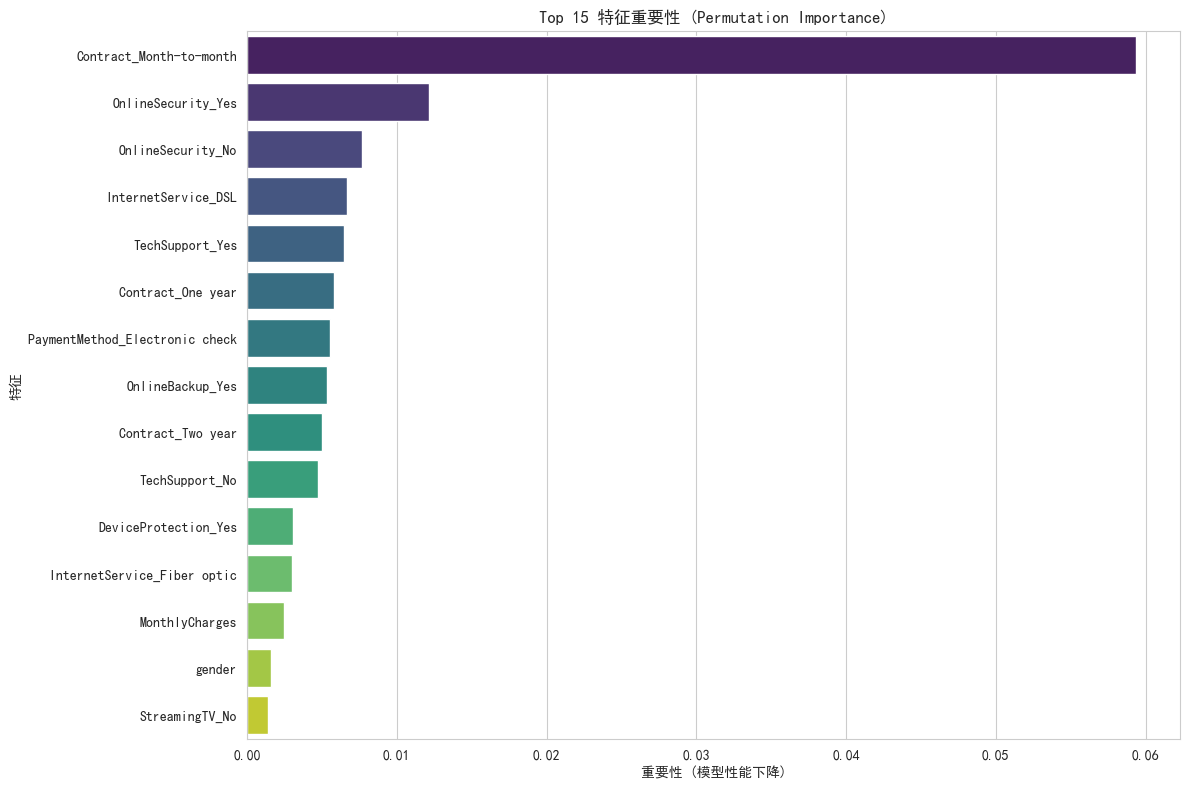


--- 模型实验与评估完成 ---


In [2]:
# notebooks/3.0-Model-Experimentation.ipynb

# 添加项目根目录到Python路径
import sys
import os
# 获取当前文件所在的目录路径
current_dir = os.path.dirname(os.path.abspath('__file__'))
# 获取项目根目录路径
project_root = os.path.abspath(os.path.join(current_dir, '..'))
# 添加项目根目录到Python路径
sys.path.append(project_root)
print(f"项目根目录已添加到Python路径: {project_root}")


# 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance # 用于特征重要性
from sklearn.linear_model import LogisticRegression  # 添加LogisticRegression的导入

# 导入自定义模块
from src.data_loader import load_data
from src.preprocessor import preprocess_data
from src.models import train_model, evaluate_model, save_model, load_model
from src.config import PROCESSED_DATA_PATH, TARGET_COLUMN, MODEL_PATH, RANDOM_STATE, FIGURES_DIR

# 设置图表风格
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout()

# 确保 FIGURES_DIR 存在
import os
os.makedirs(FIGURES_DIR, exist_ok=True)


print("--- 开始模型实验与评估 ---")

# 1. 加载并预处理数据 (确保这是最新的预处理逻辑)
# 可以在这里选择重新运行预处理，或者直接加载已处理的数据
# 为了保证 Notebook 的独立性，我们在此重新加载原始数据并预处理
print("加载原始数据并进行预处理...")
raw_df = load_data()
df_processed = preprocess_data(raw_df)

if df_processed is None:
    print("数据加载或预处理失败，无法进行模型实验。")
    exit()

X = df_processed.drop(TARGET_COLUMN, axis=1)
y = df_processed[TARGET_COLUMN]

# 划分训练集和测试集 (这里只为后续特征重要性等提供X_test, y_test，实际训练在train_model中已完成划分)
# 这一步主要是为了后续的Permutation Importance等需要X_test和y_test的函数
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


# 存储所有模型的评估结果
model_results = {}

# --- 模型 1: 逻辑回归 (Logistic Regression) ---
print("\n##### 训练和评估 Logistic Regression 模型 #####")
lr_model, lr_train_pred, lr_test_pred, y_test_lr, X_test_lr = train_model(X, y, model_name='LogisticRegression', use_smote=False)
lr_metrics = evaluate_model(lr_model, X_test_lr, y_test_lr, lr_train_pred, lr_test_pred, model_name='LogisticRegression')
model_results['Logistic Regression'] = lr_metrics
save_model(lr_model, MODEL_PATH.replace('.pkl', '_lr.pkl'))


# --- 模型 2: 随机森林 (Random Forest) (不使用 SMOTE) ---
print("\n##### 训练和评估 Random Forest 模型 (无 SMOTE) #####")
rf_model, rf_train_pred, rf_test_pred, y_test_rf, X_test_rf = train_model(X, y, model_name='RandomForest', use_smote=False, n_estimators=100, max_depth=10)
rf_metrics = evaluate_model(rf_model, X_test_rf, y_test_rf, rf_train_pred, rf_test_pred, model_name='RandomForest')
model_results['Random Forest (No SMOTE)'] = rf_metrics
save_model(rf_model, MODEL_PATH.replace('.pkl', '_rf_no_smote.pkl'))


# --- 模型 3: 随机森林 (Random Forest) (使用 SMOTE) ---
print("\n##### 训练和评估 Random Forest 模型 (带 SMOTE) #####")
rf_smote_model, rf_smote_train_pred, rf_smote_test_pred, y_test_rf_smote, X_test_rf_smote = \
    train_model(X, y, model_name='RandomForest', use_smote=True, n_estimators=100, max_depth=10)
rf_smote_metrics = evaluate_model(rf_smote_model, X_test_rf_smote, y_test_rf_smote, rf_smote_train_pred, rf_smote_test_pred, model_name='Random Forest (SMOTE)')
model_results['Random Forest (SMOTE)'] = rf_smote_metrics
save_model(rf_smote_model, MODEL_PATH.replace('.pkl', '_rf_smote.pkl'))


# --- 模型 4: 梯度提升 (Gradient Boosting) (带 SMOTE) ---
print("\n##### 训练和评估 Gradient Boosting 模型 (带 SMOTE) #####")
gb_model, gb_train_pred, gb_test_pred, y_test_gb, X_test_gb = \
    train_model(X, y, model_name='GradientBoosting', use_smote=True, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_metrics = evaluate_model(gb_model, X_test_gb, y_test_gb, gb_train_pred, gb_test_pred, model_name='Gradient Boosting (SMOTE)')
model_results['Gradient Boosting (SMOTE)'] = gb_metrics
save_model(gb_model, MODEL_PATH.replace('.pkl', '_gb_smote.pkl'))


# --- 可选：使用 GridSearchCV 进行超参数调优 (以逻辑回归为例) ---
print("\n##### 使用 GridSearchCV 进行超参数调优 (Logistic Regression) #####")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
# 为了快速演示，这里使用较小的数据集划分，实际应用中应该使用X_train_full, y_train_full
X_tune, _, y_tune, _ = train_test_split(X, y, test_size=0.8, random_state=RANDOM_STATE, stratify=y) # 仅用20%数据快速演示

grid_search_lr = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_tune, y_tune)

print(f"最佳超参数: {grid_search_lr.best_params_}")
print(f"最佳 ROC AUC Score: {grid_search_lr.best_score_:.4f}")

best_lr_model = grid_search_lr.best_estimator_
# 重新在完整数据集上训练最佳模型（或仅用测试集评估其泛化能力）
# 这里我们只用它来展示调优结果，不再重复评估，因为我们已经有lr_model的评估结果
# 实际应用中，会用best_lr_model替代lr_model，并重新评估

# --- 模型比较 ---
print("\n##### 所有模型性能比较 #####")
results_df = pd.DataFrame(model_results).T
display(results_df[['accuracy', 'precision', 'recall', 'f1_score', 'ROC_AUC']].sort_values(by='ROC_AUC', ascending=False))

# --- 绘制 ROC 曲线 ---
print("\n##### 绘制 ROC 曲线 #####")
plt.figure(figsize=(10, 8))

# Logistic Regression
y_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_lr, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'LR (AUC = {roc_auc_lr:.2f})')

# Random Forest (No SMOTE)
y_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RF (No SMOTE) (AUC = {roc_auc_rf:.2f})')

# Random Forest (SMOTE)
y_proba_rf_smote = rf_smote_model.predict_proba(X_test_rf_smote)[:, 1]
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test_rf_smote, y_proba_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)
plt.plot(fpr_rf_smote, tpr_rf_smote, color='blue', lw=2, label=f'RF (SMOTE) (AUC = {roc_auc_rf_smote:.2f})')

# Gradient Boosting (SMOTE)
y_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test_gb, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'GB (SMOTE) (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (假阳性率)')
plt.ylabel('True Positive Rate (真阳性率)')
plt.title('Receiver Operating Characteristic (ROC) 曲线')
plt.legend(loc="lower right")
plt.savefig(os.path.join(FIGURES_DIR, 'model_roc_curves.png'))
plt.show()

# --- 特征重要性分析 (以最好的模型为例，假设是 RF with SMOTE) ---
print("\n##### 特征重要性分析 (Random Forest with SMOTE) #####")

# 使用 permutation importance 更可靠，因为它考虑了模型在数据上的实际表现
# 这里我们使用训练好的rf_smote_model和X_test_rf_smote, y_test_rf_smote
result = permutation_importance(rf_smote_model, X_test_rf_smote, y_test_rf_smote, n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()[::-1] # 降序排序

feature_importances = pd.DataFrame({
    'Feature': X_test_rf_smote.columns[sorted_idx],
    'Importance': result.importances_mean[sorted_idx]
})

print("Top 15 特征重要性:")
display(feature_importances.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
plt.title('Top 15 特征重要性 (Permutation Importance)')
plt.xlabel('重要性 (模型性能下降)')
plt.ylabel('特征')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'feature_importance.png'))
plt.show()

print("\n--- 模型实验与评估完成 ---")

模型性能比较：
Logistic Regression 表现相当不错，在 ROC AUC 上略微领先 (0.841975)。
Gradient Boosting (SMOTE) 和 Random Forest (SMOTE) 也表现良好，ROC AUC 分别为 0.840487 和 0.837814。
引入 SMOTE 后，随机森林的 Recall 值有所提高 (从 0.5214 到 0.7032)，这表明模型在识别流失客户方面变得更强，但在 Precision 上有所下降 (从 0.6478 到 0.5560)。这符合SMOTE的预期效果，即以一定的精确率损失换取召回率的提升，这在流失预测这种重视召回率的场景中通常是可接受的。
超参数调优： 逻辑回归的最佳超参数为 C=1, penalty='l1'，并且最佳 ROC AUC Score 为 0.8482，略高于初始逻辑回归模型，这说明调优是有效的。
特征重要性：
Contract_Month-to-month (按月合同) 是最重要的流失驱动因素，其重要性显著高于其他特征。
OnlineSecurity_Yes/No (在线安全服务) 和 TechSupport_Yes/No (技术支持服务) 也非常重要。
InternetService_DSL 和 InternetService_Fiber optic（光纤）作为互联网服务类型也对流失有重要影响。
PaymentMethod_Electronic check (电子支票支付) 也是一个重要的因素。